# Assignment 3: Understanding cross validation and grid search

In this notebook, you will work through a series of exercises designed to deepen your understanding of cross validation and grid search methods using SciKit-learn. The assignment requires code-based solutions—**manually computed or hard-coded results will not be accepted**. 

### Instructions:
- Write your solutions in the provided cells without altering or removing the test cells.
- Upon completion, submit the notebook in **.ipynb** format through Moodle.

In [1]:
# IMPORTANT: DO NOT MODIFY OR DELETE THIS CELL.
# Do not add any cells before this one.
# This cell must remain as the first cell in your notebook for proper functionality.


<div class="alert alert-warning">

As in the previous assignment, the following cell provides two functions: one for result visualization and another for synthetic data generation. **Please DO NOT MODIFY** these functions.

You may reuse parts of this code for the final open-ended question, but ensure that both functions remain unchanged in their original forms for the guided exercises.

- The `plot_decision_surface` function creates a scatter plot showing training data points (represented by circles) and test data points (diamonds), along with the model's decision boundary.

- The `make_spirals` function generates a synthetic dataset in a spiral pattern, suitable for testing complex decision boundaries.
  
</div>

In [2]:
# IMPORTANT: DO NOT MODIFY OR DELETE THIS CELL.
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn import set_config
import pandas as pd

set_config(transform_output="pandas")


def plot_decision_surface(X_train, y_train, X_test=None, y_test=None, model=None, show_points=True, title=None):
    if X_train.shape[1] != 2:
        raise ValueError(f'Incorrect shape {X.shape}, can only plot 2D datasets')

    # just plot the dataset first
    cm = 'coolwarm'
    cm_bright = ListedColormap(['#0000FF', '#FF0000', ])

    fig, ax = plt.subplots()

    if model is not None:
        x_min, x_max = X_train[:, 0].min() - .5, X_train[:, 0].max() + .5
        y_min, y_max = X_train[:, 1].min() - .5, X_train[:, 1].max() + .5
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                             np.arange(y_min, y_max, 0.01))
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        X_mesh = np.c_[xx.ravel(), yy.ravel()]
        try:
            Z = model.decision_function(X_mesh)
        except AttributeError:
            try:
                Z = model.predict_proba(X_mesh)[:, 1]
                if Z.min() >= 0:
                    Z = Z * 2 - 1
            except AttributeError:
                Z = model.predict(X_mesh)
        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        Z_max = np.abs(Z).max()
        cs_contourf = ax.contourf(xx, yy, Z, levels=10, cmap=cm, alpha=.8, vmin=-Z_max, vmax=Z_max, )
        cs_contour = ax.contour(xx, yy, Z, [-1, 0, 1], linewidths=[1, 2, 1], alpha=0.5,
                                colors=('#0000FF', 'gray', '#FF0000'))

        # Make a colorbar for the ContourSet returned by the contourf call.
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="5%", pad=0.05)

        cbar = ax.figure.colorbar(cs_contourf, cax=cax)
        # Add the contour line levels to the colorbar
        try:
            cbar.add_lines(cs_contour)
        except Exception:
            pass
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())

    if show_points:
        # # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   #edgecolors='k', 
                   alpha=0.25)
        # ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
        #                edgecolors='k', alpha=0.6, s=140)
        if X_test is not None:
            # and testing points
            ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                       #edgecolors='k',
                       # s=100,
                       marker='D')

    ax.set_xticks(())
    ax.set_yticks(())

    ax.set_aspect('equal', 'box')
    if title is not None:
        ax.set_title(title)
    plt.show()


def make_spirals(n_samples=100, noise=0, n_turns=2.5, random_state=42, spread=1.0):
    np.random.seed(random_state)
    n_class = int(np.ceil(n_samples / 2))
    n = np.sqrt(np.random.rand(n_class, 1)) * n_turns * (2 * np.pi)
    d1x = -np.cos(n) * n * spread
    d1y = np.sin(n) * n * spread

    X = np.vstack((np.hstack((d1x, d1y)), np.hstack((-d1x, -d1y))))
    X += noise * np.random.randn(*X.shape)
    y = np.hstack([np.zeros(n_class), np.ones(n_class)])
    X = X[:n_samples]
    y = y[:n_samples]
    return X, y

<div class="alert alert-info"><b>Exercise 1: Synthetic dataset generation</b>

Write code to generate the feature matrix `X` and the target array `y` using the `make_spirals` function defined in this notebook with the parameters: `n_samples=625`, `noise=0.3`, and `spread=0.5`. After creating the dataset, call `plot_decision_surface(X, y)` to visualize the data distribution.


<br><i>[0.25 points]</i>
</div>
<div class="alert alert-warning">

Python is case-sensitive, so ensure your code matches the required capitalization.

</div>

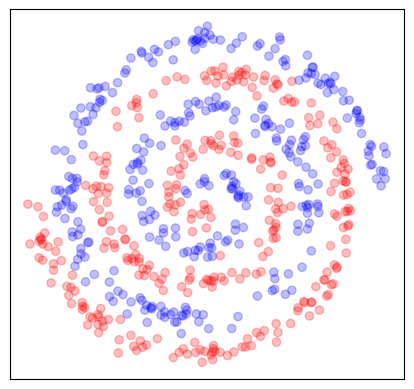

In [3]:
# Generate the feature matrix X and target array y
X, y = make_spirals(n_samples=625, noise=0.3, spread=0.5)

# Visualize the data distribution using the plot_decision_surface function
plot_decision_surface(X, y)

Do not touch

In [4]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 2: Train-test split </b>

Write code to split the generated dataset into training and testing sets using scikit learn, allocating 80% of the data for training and 20% for testing. Use `random_state=42` to ensure reproducibility. Store the resulting arrays in `X_train`, X_test, y_train, and y_test. After creating the dataset, call again plot_decision_surface(X_train, y_train, X_test, y_test) to visualize the train and test data distribution.
<br><i>[0.25 points]</i>
</div>

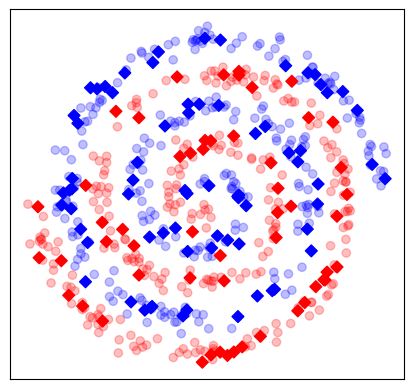

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Visualize the data distribution using the plot_decision_surface function
plot_decision_surface(X_train, y_train, X_test, y_test)

Do not touch

In [6]:
# LEAVE BLANK

In [7]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 3: Create cross-validation folds </b>

After splitting the complete dataset into training and test sets, the next step is to implement a 5-fold stratified cross-validation strategy to assess our model’s performance. Write code to create a list named `fold_indexes`, which will store the training sample indices used in each fold. 

Each of the five elements in `fold_indexes` should contain an array of sample indices specific to that fold. Since the synthetic dataset is balanced, ensure that each fold remains stratified by including 50% of indices from samples where `y_train == 0` and 50% from samples where `y_train == 1`.

<br><i>[1 point]</i>
</div>

<div class="alert alert-warning">

Store only the sample indices in the `fold_indexes` list, not the actual values. This way, you can later retrieve both the sample values and their corresponding target labels in the following exercises.

</div>

In [8]:
# Getting the number of 0 and 1 values inside y_train:
print("Number of 0 values in y_train:", np.sum(y_train == 0))
print("Number of 1 values in y_train:", np.sum(y_train == 1))



Number of 0 values in y_train: 242
Number of 1 values in y_train: 258


In [9]:
n_splits = 5

class_0_indices = np.where(y_train == 0)[0]
class_1_indices = np.where(y_train == 1)[0]

# To ensure 50-50 split, ensure the lesser of the two classses is used
samples_per_fold = min(len(class_0_indices), len(class_1_indices)) // n_splits

# Split the indices into folds
fold_indexes = []
for i in range(n_splits): # For each fold, take exact samples from each class
    class_0_fold = class_0_indices[i * samples_per_fold : (i + 1) * samples_per_fold]
    class_1_fold = class_1_indices[i * samples_per_fold : (i + 1) * samples_per_fold]
    
    fold = np.concatenate([class_0_fold, class_1_fold])
    fold_indexes.append(fold)

fold_indexes

[array([ 2,  3,  4, 10, 13, 15, 17, 18, 20, 21, 23, 25, 26, 29, 30, 32, 33,
        36, 37, 40, 41, 43, 46, 47, 48, 49, 53, 55, 56, 57, 58, 60, 61, 63,
        64, 66, 69, 70, 77, 79, 80, 81, 82, 84, 87, 89, 92, 93,  0,  1,  5,
         6,  7,  8,  9, 11, 12, 14, 16, 19, 22, 24, 27, 28, 31, 34, 35, 38,
        39, 42, 44, 45, 50, 51, 52, 54, 59, 62, 65, 67, 68, 71, 72, 73, 74,
        75, 76, 78, 83, 85, 86, 88, 90, 91, 94, 95], dtype=int64),
 array([ 96,  97,  98,  99, 100, 101, 103, 104, 105, 111, 115, 116, 118,
        121, 123, 124, 125, 126, 129, 135, 136, 137, 140, 145, 147, 148,
        150, 151, 152, 154, 155, 156, 158, 161, 165, 166, 171, 172, 176,
        177, 180, 187, 188, 190, 191, 192, 193, 194, 102, 106, 107, 108,
        109, 110, 112, 113, 114, 117, 119, 120, 122, 127, 128, 130, 131,
        132, 133, 134, 138, 139, 141, 142, 143, 144, 146, 149, 153, 157,
        159, 160, 162, 163, 164, 167, 168, 169, 170, 173, 174, 175, 178,
        179, 181, 182, 183, 184], dtype=in

In [10]:
# confirm stratification of 50-50 split in fold indexes
for i, fold in enumerate(fold_indexes):
    num_class_0 = np.sum(y_train[fold] == 0)
    num_class_1 = np.sum(y_train[fold] == 1)
    
    print(f"Class 0 samples:{num_class_0}, Class 1 samples:{num_class_1}")

Class 0 samples:48, Class 1 samples:48
Class 0 samples:48, Class 1 samples:48
Class 0 samples:48, Class 1 samples:48
Class 0 samples:48, Class 1 samples:48
Class 0 samples:48, Class 1 samples:48


Do not touch

In [11]:
# LEAVE BLANK

In [12]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 4: Create folds combinations</b>

Once the folds are created, write code to generate the index combinations for the training and validation sets at each cross-validation step. Store these combinations in a list named `folds`, which should contain five tuples. Each tuple should have two elements:

1. The indices for the training samples (i.e., the combined indices of the four folds used for training).
2. The indices for the validation samples (i.e., the indices of the fold designated for validation in that step).

<br><i>[1 point]</i>
</div>

In [13]:
folds = []

# Loop through each fold by first creating the index with respect to the validation set since the indexing is unique
for i in range(len(fold_indexes)):

    validation_index = fold_indexes[i]
    
    train_index = []
    for j, fold in enumerate(fold_indexes):
        if j != i:  # Exclude the current validation fold
            train_index.append(fold)
    train_index = np.concatenate(train_index)  # Flatten the list of folds into one array
    
    folds.append((train_index, validation_index))

folds


[(array([ 96,  97,  98,  99, 100, 101, 103, 104, 105, 111, 115, 116, 118,
         121, 123, 124, 125, 126, 129, 135, 136, 137, 140, 145, 147, 148,
         150, 151, 152, 154, 155, 156, 158, 161, 165, 166, 171, 172, 176,
         177, 180, 187, 188, 190, 191, 192, 193, 194, 102, 106, 107, 108,
         109, 110, 112, 113, 114, 117, 119, 120, 122, 127, 128, 130, 131,
         132, 133, 134, 138, 139, 141, 142, 143, 144, 146, 149, 153, 157,
         159, 160, 162, 163, 164, 167, 168, 169, 170, 173, 174, 175, 178,
         179, 181, 182, 183, 184, 195, 197, 200, 205, 207, 209, 210, 211,
         212, 215, 218, 220, 223, 227, 232, 234, 235, 236, 237, 239, 240,
         244, 246, 247, 248, 252, 254, 255, 258, 261, 266, 268, 269, 270,
         273, 276, 277, 278, 280, 281, 282, 284, 291, 295, 297, 298, 299,
         305, 185, 186, 189, 196, 198, 199, 201, 202, 203, 204, 206, 208,
         213, 214, 216, 217, 219, 221, 222, 224, 225, 226, 228, 229, 230,
         231, 233, 238, 241, 242, 243,

In [14]:
# Output the folds for verification of the number of samples with respect to fold indexes
for train, validation in folds:
    print(f"Training set size: {len(train)}, Validation set size: {len(validation)}")

Training set size: 384, Validation set size: 96
Training set size: 384, Validation set size: 96
Training set size: 384, Validation set size: 96
Training set size: 384, Validation set size: 96
Training set size: 384, Validation set size: 96


Do not touch

In [15]:
# LEAVE BLANK

In [16]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 5: Generate model candidates for the grid search </b>

Write code to create a collection of decision tree model candidates using the following hyperparameters:

- `max_depth`: [None, 3, 5, 7]
- `criterion`: ['gini', 'entropy']
- `splitter`: ['best', 'random']
- `max_features`: ['sqrt', 'log2']

Since grid search performs an exhaustive search over the parameter space, create a `DataFrame` named `param_grid` where each row represents a unique combination of these hyperparameters. Use the hyperparameter names as the column headers.

<br><i>[0.5 points]</i>
</div>


In [17]:
max_depth = [None, 3, 5, 7]
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_features = ['sqrt', 'log2']

# Create an empty list to store all candidates
model_candidates = []

# Generate all combinations using nested loops
for depth in max_depth:
    for criteria in criterion:
        for split in splitter:
            for feature in max_features:
                model_candidates.append({
                    'max_depth': depth,
                    'criterion': criteria,
                    'splitter': split,
                    'max_features': feature
                })

# Convert the list of combinations into a DataFrame
param_grid = pd.DataFrame(model_candidates)

param_grid

,max_depth,criterion,splitter,max_features
0,NaN,gini,best,sqrt
1,NaN,gini,best,log2
2,NaN,gini,random,sqrt
3,NaN,gini,random,log2
4,NaN,entropy,best,sqrt
5,NaN,entropy,best,log2
6,NaN,entropy,random,sqrt
7,NaN,entropy,random,log2
8,3.0,gini,best,sqrt
9,3.0,gini,best,log2


Do not touch

In [18]:
# LEAVE BLANK

In [19]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 6: Fit all model candidates and store their performance metrics</b>

For each hyperparameter combination in the `param_grid` DataFrame, write code to train and validate decision tree models using the index fold combinations stored in the `folds` list. After training the models across the different folds, store the mean cross-validated training and validation metrics in a DataFrame named `metrics`.

Specifically, include the following metrics: `'train_accuracy'`, `'train_precision'`, `'train_recall'`, `'train_f1'`, `'val_accuracy'`, `'val_precision'`, `'val_recall'`, and `'val_f1'`. Also, record the corresponding hyperparameters for each model: `'max_depth'`, `'criterion'`, `'splitter'`, and `'max_features'`.

<br><i>[1 point]</i>
</div>

In [20]:
import sklearn.metrics
sklearn.metrics.get_scorer_names()

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'matthews_corrcoef',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_negative_likelihood_ratio',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'positive_likelihood_ratio',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

# Step 1: Define the scoring metrics: We use val_ as later on the mean_test metric will be actually the validation metric, and train_ will be the training metric
scoring = {
    'train_accuracy': make_scorer(accuracy_score),
    'train_precision':make_scorer(precision_score),
    'train_recall': make_scorer(recall_score),
    'train_f1': make_scorer(f1_score),
    'val_accuracy': make_scorer(accuracy_score),
    'val_precision': make_scorer(precision_score),
    'val_recall': make_scorer(recall_score),
    'val_f1': make_scorer(f1_score)
}

In [ ]:
# Step 2: Create a pipeline with the DecisionTreeClassifier
pipeline = Pipeline([
    ('dt', DecisionTreeClassifier(random_state=42))
])

# Step 3: Define the parameter grid. Exercise 6 did not mention that we have to use the param_grid Dataframe that is already created in Exercise 5.
param_grid = {
    'dt__max_depth': [None, 3, 5, 7],
    'dt__criterion': ['gini', 'entropy'],
    'dt__splitter': ['best', 'random'],
    'dt__max_features': ['sqrt', 'log2']
}

# Step 4: Set up GridSearchCV. Apparently we have to indicate the refit parameter for the GridSearchCV to work. 
# We chose 'val_accuracy' as the metric to optimize since it a balanced training and validation set.
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid=param_grid,
    cv=folds,  # Use the folds variable created in Exercise 4
    scoring=scoring,
    refit='val_accuracy',
    verbose=1,
    return_train_score=True
)

# Step 5: Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Step 6: Extract results and format the metrics DataFrame
cv_results = pd.DataFrame(grid_search.cv_results_)

#view all columns of the cv_results DataFrame for checking
pd.set_option('display.max_columns', None)
cv_results

Fitting 5 folds for each of 32 candidates, totalling 160 fits


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_dt__criterion,param_dt__max_depth,param_dt__max_features,param_dt__splitter,params,split0_test_train_accuracy,split1_test_train_accuracy,split2_test_train_accuracy,split3_test_train_accuracy,split4_test_train_accuracy,mean_test_train_accuracy,std_test_train_accuracy,rank_test_train_accuracy,split0_train_train_accuracy,split1_train_train_accuracy,split2_train_train_accuracy,split3_train_train_accuracy,split4_train_train_accuracy,mean_train_train_accuracy,std_train_train_accuracy,split0_test_train_precision,split1_test_train_precision,split2_test_train_precision,split3_test_train_precision,split4_test_train_precision,mean_test_train_precision,std_test_train_precision,rank_test_train_precision,split0_train_train_precision,split1_train_train_precision,split2_train_train_precision,split3_train_train_precision,split4_train_train_precision,mean_train_train_precision,std_train_train_precision,split0_test_train_recall,split1_test_train_recall,split2_test_train_recall,split3_test_train_recall,split4_test_train_recall,mean_test_train_recall,std_test_train_recall,rank_test_train_recall,split0_train_train_recall,split1_train_train_recall,split2_train_train_recall,split3_train_train_recall,split4_train_train_recall,mean_train_train_recall,std_train_train_recall,split0_test_train_f1,split1_test_train_f1,split2_test_train_f1,split3_test_train_f1,split4_test_train_f1,mean_test_train_f1,std_test_train_f1,rank_test_train_f1,split0_train_train_f1,split1_train_train_f1,split2_train_train_f1,split3_train_train_f1,split4_train_train_f1,mean_train_train_f1,std_train_train_f1,split0_test_val_accuracy,split1_test_val_accuracy,split2_test_val_accuracy,split3_test_val_accuracy,split4_test_val_accuracy,mean_test_val_accuracy,std_test_val_accuracy,rank_test_val_accuracy,split0_train_val_accuracy,split1_train_val_accuracy,split2_train_val_accuracy,split3_train_val_accuracy,split4_train_val_accuracy,mean_train_val_accuracy,std_train_val_accuracy,split0_test_val_precision,split1_test_val_precision,split2_test_val_precision,split3_test_val_precision,split4_test_val_precision,mean_test_val_precision,std_test_val_precision,rank_test_val_precision,split0_train_val_precision,split1_train_val_precision,split2_train_val_precision,split3_train_val_precision,split4_train_val_precision,mean_train_val_precision,std_train_val_precision,split0_test_val_recall,split1_test_val_recall,split2_test_val_recall,split3_test_val_recall,split4_test_val_recall,mean_test_val_recall,std_test_val_recall,rank_test_val_recall,split0_train_val_recall,split1_train_val_recall,split2_train_val_recall,split3_train_val_recall,split4_train_val_recall,mean_train_val_recall,std_train_val_recall,split0_test_val_f1,split1_test_val_f1,split2_test_val_f1,split3_test_val_f1,split4_test_val_f1,mean_test_val_f1,std_test_val_f1,rank_test_val_f1,split0_train_val_f1,split1_train_val_f1,split2_train_val_f1,split3_train_val_f1,split4_train_val_f1,mean_train_val_f1,std_train_val_f1
0,0.001589,0.000509,0.005417,0.001049,gini,None,sqrt,best,"{'dt__criterion': 'gini', 'dt__max_depth': Non...",0.875000,0.854167,0.895833,0.760417,0.812500,0.839583,0.048233,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.891304,0.854167,0.895833,0.719298,0.800000,0.832121,0.066043,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.854167,0.854167,0.895833,0.854167,0.833333,0.858333,0.020412,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.872340,0.854167,0.895833,0.780952,0.816327,0.843924,0.040827,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.875000,0.854167,0.895833,0.760417,0.812500,0.839583,0.048233,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.891304,0.854167,0.895833,0.719298,0.800000,0.832121,0.066043,3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.854167,0.854167,0.895833,0.854167,0.833333,0.858333,0.020412,5,1.000000,1.000000,1.000000,1.000000,1.0

In [23]:
# Step 7: Select relevant columns for metrics and hyperparameters and rename them for readability
metrics = cv_results[[
    'param_dt__max_depth', 'param_dt__criterion', 'param_dt__splitter', 'param_dt__max_features',
    'mean_train_train_accuracy', 'mean_train_train_precision', 'mean_train_train_recall', 'mean_train_train_f1',
    'mean_test_val_accuracy', 'mean_test_val_precision', 'mean_test_val_recall', 'mean_test_val_f1'
]].rename(columns={
    'param_dt__max_depth': 'max_depth',
    'param_dt__criterion': 'criterion',
    'param_dt__splitter': 'splitter',
    'param_dt__max_features': 'max_features',
    'mean_train_train_accuracy': 'train_accuracy',
    'mean_train_train_precision': 'train_precision',
    'mean_train_train_recall': 'train_recall',
    'mean_train_train_f1': 'train_f1',
    'mean_test_val_accuracy': 'val_accuracy',
    'mean_test_val_precision': 'val_precision',
    'mean_test_val_recall': 'val_recall',
    'mean_test_val_f1': 'val_f1'
})

# Step 8: Output the metrics into DataFrame
metrics = pd.DataFrame(metrics)
metrics

,max_depth,criterion,splitter,max_features,train_accuracy,train_precision,train_recall,train_f1,val_accuracy,val_precision,val_recall,val_f1
0,None,gini,best,sqrt,1.000000,1.000000,1.000000,1.000000,0.839583,0.832121,0.858333,0.843924
1,None,gini,random,sqrt,1.000000,1.000000,1.000000,1.000000,0.816667,0.816337,0.816667,0.816390
2,None,gini,best,log2,1.000000,1.000000,1.000000,1.000000,0.839583,0.832121,0.858333,0.843924
3,None,gini,random,log2,1.000000,1.000000,1.000000,1.000000,0.816667,0.816337,0.816667,0.816390
4,3,gini,best,sqrt,0.634375,0.613380,0.902083,0.705014,0.589583,0.553377,0.858333,0.656841
5,3,gini,random,sqrt,0.579167,0.618594,0.482292,0.513843,0.560417,0.589889,0.458333,0.485184
6,3,gini,best,log2,0.634375,0.613380,0.902083,0.705014,0.589583,0.553377,0.858333,0.656841
7,3,gini,random,log2,0.579167,0.618594,0.482292,0.513843,0.560417,0.589889,0.458333,0.485184
8,5,gini,best,sqrt,0.676562,0.812462,0.498958,0.596518,0.600000,0.682890,0.416667,0.499901
9,5,gini,random,sqrt,0.653125,0.665656,0.635417,0.643069,0.610417,0.628568,0.575000,0.593289


Do not touch

In [24]:
# LEAVE BLANK

In [25]:
# LEAVE BLANK

In [26]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 7: Select best model and report best attained scores</b>

Using the previously computed metrics, write code to select the best hyperparameter combination based on the accuracy metric. Then, calculate and store the model's generalization accuracy score in a variable named `generalization_score` using the appropriate dataset.

<br><i>[1 point]</i>
</div>


In [27]:
best_params = grid_search.best_params_
best_params


{'dt__criterion': 'entropy',
 'dt__max_depth': None,
 'dt__max_features': 'sqrt',
 'dt__splitter': 'best'}

In [28]:
best_dt = grid_search.best_estimator_
best_dt

Pipeline(steps=[('dt',
                 DecisionTreeClassifier(criterion='entropy',
                                        max_features='sqrt',
                                        random_state=42))])

In [29]:
# Step 3: Use the best model to make predictions on the test set
y_test_pred = best_dt.predict(X_test)

# Step 4: Calculate the generalization accuracy score on the test set
generalization_score = accuracy_score(y_test, y_test_pred)
generalization_score

0.888

In [30]:
grid_search.best_score_

0.8583333333333334

Do not touch

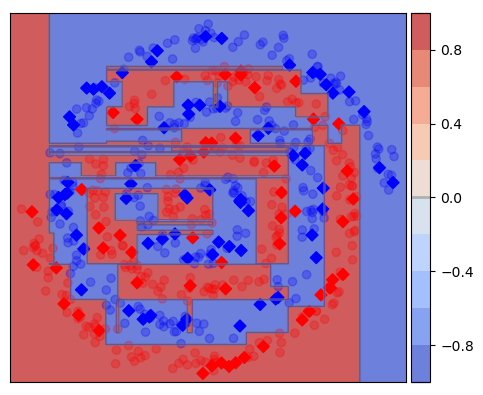

In [31]:
# DO NOT MODIFY THIS CELL. Simply execute it.
plot_decision_surface(X_train, y_train, X_test, y_test, best_dt)

In [32]:
# LEAVE BLANK

In [33]:
# LEAVE BLANK

In [34]:
# LEAVE BLANK

In [35]:
# LEAVE BLANK

<div class="alert alert-info"><b>Exercise 8: Model selection with Scikit-learn GridSearchCV</b>

The previous custom grid search was limited, as it only optimized the hyperparameters of a decision tree classifier on a simple 2D synthetic dataset. Now, let’s extend this process by using Scikit-learn’s `GridSearchCV` in combination with pipelines to broaden our search across a more complex dataset and test the parameters of each step within the pipeline.

This exercise is open-ended, allowing you to explore and tune hyperparameters from any pipeline component, such as scalers, imputers, transformers, encoders, or model algorithms. Don’t restrict yourself to linear models or decision trees; instead, experiment with a variety of models, such as XGBoost or SVM classifiers. Finally, return the estimated generalization performance of the selected model.

<br><i>[5 points]</i>
</div>
<div class="alert alert-success">

<b>About the two datasets used in this exercise</b>

<u>Context</u>

Superheroes have been in popular culture for a long time, and now more than ever. Since its creation, superheroes have not been diverse, but this is changing rapidly. The two datasets aim to provide an overview of heroes and their physical and power characteristics, helping curious people to identify trends and patterns. In this case, we want to understand how physical attributes and powers define superheroes' alignment (superhero, supervillain).

<u>Content</u>
    
The columns included in both datasets are: 
- **Dataset part 1**: Name, Gender, Eye color, Race, Hair color, Height, Publisher, Skin color, Alignment, Weight,Has Superpowers, Power Level, Intelligence Level
- **Dataset part 2**: Previous columns and, Agility, Accelerated Healing, Lantern Power Ring, Dimensional Awareness, Cold Resistance, Durability, Stealth, Energy Absorption, Flight, Danger Sense, Underwater breathing, Marksmanship, Weapons Master, Power Augmentation, Animal Attributes, Longevity, Intelligence, Super Strength, Cryokinesis, Telepathy, Energy Armor, Energy Blasts, Duplication, Size Changing, Density Control, Stamina, Astral Travel,Audio Control, Dexterity, Omnitrix, Super Speed, Possession, Animal Oriented Powers, Weapon-based Powers, Electrokinesis, Darkforce Manipulation, Death Touch, Teleportation, Enhanced Senses, Telekinesis, Energy Beams, Magic, Hyperkinesis, Jump, Clairvoyance, Dimensional Travel, Power Sense, Shapeshifting, Peak Human Condition, Immortality, Camouflage, Element Control, Phasing, Astral Projection, Electrical Transport, Fire Control,Projection, Summoning, Enhanced Memory, Reflexes, Invulnerability, Energy Constructs, Force Fields, Self-Sustenance ,Anti-Gravity, Empathy, Power Nullifier, Radiation Control, Psionic Powers, Elasticity, Substance Secretion, Elemental Transmogrification, Technopath/Cyberpath, Photographic Reflexes, Seismic Power, Animation, Precognition, Mind Control, Fire Resistance, Power Absorption, Enhanced Hearing, Nova Force, Insanity, Hypnokinesis, Animal Control, Natural Armor, Intangibility, Enhanced Sight, Molecular Manipulation, Heat Generation, Adaptation, Gliding, Power Suit, Mind Blast, Probability Manipulation, Gravity Control, Regeneration, Light Control, Echolocation, Levitation, Toxin and Disease Control, Banish, Energy Manipulation, Heat Resistance, Natural Weapons, Time Travel, Enhanced Smell, Illusions, Thirstokinesis, Hair Manipulation, Illumination, Omnipotent, Cloaking, Changing Armor, Power Cosmic, Biokinesis, Water Control, Radiation Immunity, Vision - Telescopic, Toxin and Disease Resistance, Spatial Awareness, Energy Resistance, Telepathy Resistance, Molecular Combustion, Omnilingualism, Portal Creation, Magnetism, Mind Control Resistance, Plant Control, Sonar, Sonic Scream, Time Manipulation, Enhanced Touch, Magic Resistance, Invisibility, Sub-Mariner, Radiation Absorption, Intuitive aptitude, Vision - Microscopic, Melting, Wind Control, Super Breath, Wallcrawling, Vision - Night, Vision - Infrared, Grim Reaping, Matter Absorption, The Force, Resurrection, Terrakinesis, Vision - Heat, Vitakinesis, Radar Sense, Qwardian Power Ring, Weather Control, Vision - X-Ray, Vision - Thermal, Web Creation, Reality Warping, Odin Force, Symbiote Costume, Speed Force, Phoenix Force, Molecular Dissipation, Vision - Cryo, Omnipresent, Omniscient.

Column names are self-explanatory. Physical attributes are numerical or categorical, while superpowers are dummy (Onehot) variables.

</div>

<div class="alert alert-warning">
Before starting the grid search, merge the datasets using Pandas on name and publisher.
</div>

In [36]:
# DO NOT MODIFY NOR ADD CODE TO THIS CELL
import pandas as pd

df_physical_traits = pd.read_csv('https://raw.githubusercontent.com/jnin/information-systems/refs/heads/main/data/superheroes_superpowers.csv', index_col=False)
df_superpowers = pd.read_csv(' https://raw.githubusercontent.com/jnin/information-systems/refs/heads/main/data/superheroes_%20physical_traits.csv', index_col=False)


Do not touch above

In [37]:
df_physical_traits.head()

,name,Publisher,Agility,Accelerated Healing,Lantern Power Ring,Dimensional Awareness,Cold Resistance,Durability,Stealth,Energy Absorption,Flight,Danger Sense,Underwater breathing,Marksmanship,Weapons Master,Power Augmentation,Animal Attributes,Longevity,Intelligence,Super Strength,Cryokinesis,Telepathy,Energy Armor,Energy Blasts,Duplication,Size Changing,Density Control,Stamina,Astral Travel,Audio Control,Dexterity,Omnitrix,Super Speed,Possession,Animal Oriented Powers,Weapon-based Powers,Electrokinesis,Darkforce Manipulation,Death Touch,Teleportation,Enhanced Senses,Telekinesis,Energy Beams,Magic,Hyperkinesis,Jump,Clairvoyance,Dimensional Travel,Power Sense,Shapeshifting,Peak Human Condition,Immortality,Camouflage,Element Control,Phasing,Astral Projection,Electrical Transport,Fire Control,Projection,Summoning,Enhanced Memory,Reflexes,Invulnerability,Energy Constructs,Force Fields,Self-Sustenance,Anti-Gravity,Empathy,Power Nullifier,Radiation Control,Psionic Powers,Elasticity,Substance Secretion,Elemental Transmogrification,Technopath/Cyberpath,Photographic Reflexes,Seismic Power,Animation,Precognition,Mind Control,Fire Resistance,Power Absorption,Enhanced Hearing,Nova Force,Insanity,Hypnokinesis,Animal Control,Natural Armor,Intangibility,Enhanced Sight,Molecular Manipulation,Heat Generation,Adaptation,Gliding,Power Suit,Mind Blast,Probability Manipulation,Gravity Control,Regeneration,Light Control,Echolocation,Levitation,Toxin and Disease Control,Banish,Energy Manipulation,Heat Resistance,Natural Weapons,Time Travel,Enhanced Smell,Illusions,Thirstokinesis,Hair Manipulation,Illumination,Omnipotent,Cloaking,Changing Armor,Power Cosmic,Biokinesis,Water Control,Radiation Immunity,Vision - Telescopic,Toxin and Disease Resistance,Spatial Awareness,Energy Resistance,Telepathy Resistance,Molecular Combustion,Omnilingualism,Portal Creation,Magnetism,Mind Control Resistance,Plant Control,Sonar,Sonic Scream,Time Manipulation,Enhanced Touch,Magic Resistance,Invisibility,Sub-Mariner,Radiation Absorption,Intuitive aptitude,Vision - Microscopic,Melting,Wind Control,Super Breath,Wallcrawling,Vision - Night,Vision - Infrared,Grim Reaping,Matter Absorption,The Force,Resurrection,Terrakinesis,Vision - Heat,Vitakinesis,Radar Sense,Qwardian Power Ring,Weather Control,Vision - X-Ray,Vision - Thermal,Web Creation,Reality Warping,Odin Force,Symbiote Costume,Speed Force,Phoenix Force,Molecular Dissipation,Vision - Cryo,Omnipresent,Omniscient
0,A-Bomb,Marvel Comics,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Dark Horse Comics,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False

In [38]:
df_physical_traits.shape

(633, 169)

In [39]:
df_superpowers.head()

,Name,Gender,Eye color,Race,Hair color,Height,Publisher,Skin color,Alignment,Weight,Has Superpowers,Power Level,Intelligence Level
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0,False,Extremely Powerful,Super-Genius
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,Below Average,Average Intelligence
2,Abin Sur,Male,blue,Ungaran,No Hair,185.0,DC Comics,red,good,90.0,True,Average,Low Intelligence
3,Abomination,Male,green,Human / Radiation,No Hair,203.0,Marvel Comics,NaN,bad,441.0,False,Extremely Powerful,Smart
4,Abraxas,Male,blue,Cosmic Entity,Black,-99.0,Marvel Comics,NaN,bad,-99.0,False,Extremely Powerful,Genius


In [40]:
df_superpowers.shape

(734, 13)

Step 1: Merge Datasets

In [41]:
# Ensure consistent column naming and header values later on for referencing
df_physical_traits.rename(columns=lambda x: x.strip().lower(), inplace=True)
df_superpowers.rename(columns=lambda x: x.strip().lower(), inplace=True)

df = pd.merge(df_superpowers, df_physical_traits, on=['name', 'publisher'], how='inner')
df.head()

,name,gender,eye color,race,hair color,height,publisher,skin color,alignment,weight,has superpowers,power level,intelligence level,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,underwater breathing,marksmanship,weapons master,power augmentation,animal attributes,longevity,intelligence,super strength,cryokinesis,telepathy,energy armor,energy blasts,duplication,size changing,density control,stamina,astral travel,audio control,dexterity,omnitrix,super speed,possession,animal oriented powers,weapon-based powers,electrokinesis,darkforce manipulation,death touch,teleportation,enhanced senses,telekinesis,energy beams,magic,hyperkinesis,jump,clairvoyance,dimensional travel,power sense,shapeshifting,peak human condition,immortality,camouflage,element control,phasing,astral projection,electrical transport,fire control,projection,summoning,enhanced memory,reflexes,invulnerability,energy constructs,force fields,self-sustenance,anti-gravity,empathy,power nullifier,radiation control,psionic powers,elasticity,substance secretion,elemental transmogrification,technopath/cyberpath,photographic reflexes,seismic power,animation,precognition,mind control,fire resistance,power absorption,enhanced hearing,nova force,insanity,hypnokinesis,animal control,natural armor,intangibility,enhanced sight,molecular manipulation,heat generation,adaptation,gliding,power suit,mind blast,probability manipulation,gravity control,regeneration,light control,echolocation,levitation,toxin and disease control,banish,energy manipulation,heat resistance,natural weapons,time travel,enhanced smell,illusions,thirstokinesis,hair manipulation,illumination,omnipotent,cloaking,changing armor,power cosmic,biokinesis,water control,radiation immunity,vision - telescopic,toxin and disease resistance,spatial awareness,energy resistance,telepathy resistance,molecular combustion,omnilingualism,portal creation,magnetism,mind control resistance,plant control,sonar,sonic scream,time manipulation,enhanced touch,magic resistance,invisibility,sub-mariner,radiation absorption,intuitive aptitude,vision - microscopic,melting,wind control,super breath,wallcrawling,vision - night,vision - infrared,grim reaping,matter absorption,the force,resurrection,terrakinesis,vision - heat,vitakinesis,radar sense,qwardian power ring,weather control,vision - x-ray,vision - thermal,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
0,A-Bomb,Male,yellow,Human,No Hair,203.0,Marvel Comics,NaN,good,441.0,False,Extremely Powerful,Super-Genius,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Abe Sapien,Male,blue,Icthyo Sapien,No Hair,191.0,Dark Horse Comics,blue,good,65.0,True,Below Average,Average Intelligence,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,Fals

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Columns: 180 entries, name to omniscient
dtypes: bool(168), float64(2), object(10)
memory usage: 166.9+ KB


In [43]:
#obtain dtypes of the columns which are float64:
df.dtypes[df.dtypes == 'float64']

height    float64
weight    float64
dtype: object

In [44]:
#display the number of missing values in each column to create a strategy for handling missing values
df.isna().sum().sort_values(ascending=False).reset_index().head(10)

,index,0
0,skin color,577
1,race,242
2,hair color,125
3,eye color,124
4,gender,17
5,alignment,6
6,name,0
7,cloaking,0
8,natural weapons,0
9,time travel,0


In [45]:
# We identify the dtype of the columns with missing values for the code to do an imputation strategy later on
missing_value_columns = df.columns[df.isna().sum() > 0]
df[missing_value_columns].dtypes

gender        object
eye color     object
race          object
hair color    object
skin color    object
alignment     object
dtype: object

From the above we see that 'alignment' which will be our target variable later on, has some missing values. 

Since they are the target variable, it would not make sense to impute missing values as it is ironic that we would be predicting the target variable later on.

Logistically speaking, SimpleImputer is only for feature matrix X and not for y.

Thus, we decided to drop all rows with 'alignment' having missing values.

In [46]:
df.dropna(subset=['alignment'], inplace=True)

df.shape

(641, 180)

We then determine that there are 641 rows left with 179 features and 1 target variable

We do an inspection to confirm if the classification is going to be binary or not.

In [47]:
df['alignment'].value_counts()

alignment
good       424
bad        193
neutral     24
Name: count, dtype: int64

Oh no. We see that the Target variable requires multi-class classification now, and require balancing the imbalanced values of neutral having only 24 counts.

Next, I plan to get rid of categorical column attributes with values that are too insignificant to be representative as a data-point for that column attribute.

These insignificant data points we define it as having value_counts of less than 1% of the whole column data. 

If they are to remain, they complicate the feature matrix. 

Worse, when splitting the data into train and test, there is too few of such data for the model to learn such data points and have predictive / generalization power

In [48]:
# We first drop these 2 columns as they are not relevant to the model because the names are unique to each character
df = df.drop(columns=['name', 'publisher'])

In [49]:
# Identify categorical columns for the eventual encoding process
df_cat_cols = df.select_dtypes(include=['object', 'bool']).columns

In [50]:
# Columns and values that fall below the threshold for categorical columns
low_freq_cat = {}

# Iterate through each categorical column
for col in df_cat_cols:
    value_counts = df[col].value_counts(normalize=True)  # Get normalized counts
    low_values = value_counts[value_counts < 0.01] # Identify low-frequency values
    if not low_values.empty:
        low_freq_cat[col] = low_values.to_dict()

low_freq_cat

{'eye color': {'grey': 0.009633911368015413,
  'purple': 0.007707129094412331,
  'gold': 0.005780346820809248,
  'yellow (without irises)': 0.0038535645472061657,
  'violet': 0.0038535645472061657,
  'amber': 0.0038535645472061657,
  'silver': 0.0019267822736030828,
  'yellow / red': 0.0019267822736030828,
  'blue / white': 0.0019267822736030828,
  'green / blue': 0.0019267822736030828,
  'white / red': 0.0019267822736030828,
  'indigo': 0.0019267822736030828,
  'yellow / blue': 0.0019267822736030828,
  'bown': 0.0019267822736030828},
 'race': {'New God': 0.007518796992481203,
  'Human / Altered': 0.007518796992481203,
  'Saiyan': 0.005012531328320802,
  'Demi-God': 0.005012531328320802,
  'Eternal': 0.005012531328320802,
  'Human / Cosmic': 0.005012531328320802,
  'Amazon': 0.005012531328320802,
  'Human-Kree': 0.005012531328320802,
  'Animal': 0.005012531328320802,
  'Metahuman': 0.005012531328320802,
  'Frost Giant': 0.005012531328320802,
  'Vampire': 0.005012531328320802,
  'Yautja

In [51]:
# Iterate through the identified low-frequency columns and replace each low frequency value with NaN
for col, low_values in low_freq_cat.items():
    df[col] = df[col].replace(low_values.keys(), np.nan)

# Check the unique values in the categorical columns
df[df_cat_cols]


,gender,eye color,race,hair color,skin color,alignment,has superpowers,power level,intelligence level,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,underwater breathing,marksmanship,weapons master,power augmentation,animal attributes,longevity,intelligence,super strength,cryokinesis,telepathy,energy armor,energy blasts,duplication,size changing,density control,stamina,astral travel,audio control,dexterity,omnitrix,super speed,possession,animal oriented powers,weapon-based powers,electrokinesis,darkforce manipulation,death touch,teleportation,enhanced senses,telekinesis,energy beams,magic,hyperkinesis,jump,clairvoyance,dimensional travel,power sense,shapeshifting,peak human condition,immortality,camouflage,element control,phasing,astral projection,electrical transport,fire control,projection,summoning,enhanced memory,reflexes,invulnerability,energy constructs,force fields,self-sustenance,anti-gravity,empathy,power nullifier,radiation control,psionic powers,elasticity,substance secretion,elemental transmogrification,technopath/cyberpath,photographic reflexes,seismic power,animation,precognition,mind control,fire resistance,power absorption,enhanced hearing,nova force,insanity,hypnokinesis,animal control,natural armor,intangibility,enhanced sight,molecular manipulation,heat generation,adaptation,gliding,power suit,mind blast,probability manipulation,gravity control,regeneration,light control,echolocation,levitation,toxin and disease control,banish,energy manipulation,heat resistance,natural weapons,time travel,enhanced smell,illusions,thirstokinesis,hair manipulation,illumination,omnipotent,cloaking,changing armor,power cosmic,biokinesis,water control,radiation immunity,vision - telescopic,toxin and disease resistance,spatial awareness,energy resistance,telepathy resistance,molecular combustion,omnilingualism,portal creation,magnetism,mind control resistance,plant control,sonar,sonic scream,time manipulation,enhanced touch,magic resistance,invisibility,sub-mariner,radiation absorption,intuitive aptitude,vision - microscopic,melting,wind control,super breath,wallcrawling,vision - night,vision - infrared,grim reaping,matter absorption,the force,resurrection,terrakinesis,vision - heat,vitakinesis,radar sense,qwardian power ring,weather control,vision - x-ray,vision - thermal,web creation,reality warping,odin force,symbiote costume,speed force,phoenix force,molecular dissipation,vision - cryo,omnipresent,omniscient
0,Male,yellow,Human,No Hair,NaN,good,False,Extremely Powerful,Super-Genius,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Male,blue,NaN,No Hair,blue,good,True,Below Average,Average Intelligence,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,Fal

In [52]:
#Display all the unique values in the categorical columns, which we have imputed as missing values

for col in df_cat_cols:
    print(df[col].unique())

['Male' 'Female' nan]
['yellow' 'blue' 'green' 'brown' nan 'red' 'white' 'black' 'hazel']
['Human' nan 'Human / Radiation' 'Cosmic Entity' 'Cyborg' 'Android'
 'Mutant' 'God / Eternal' 'Atlantean' 'Alien' 'Alpha' 'Inhuman' 'Demon'
 'Symbiote' 'Kryptonian' 'Asgardian']
['No Hair' 'Black' 'Blond' 'Brown' nan 'White' 'Red' 'Auburn'
 'Strawberry Blond' 'Green']
[nan 'blue' 'red' 'black' 'grey' 'gold' 'green' 'white' 'pink' 'silver'
 'red / black' 'yellow' 'purple' 'orange / white' 'gray' 'blue-white'
 'orange']
['good' 'bad' 'neutral']
[False  True]
['Extremely Powerful' 'Below Average' 'Average' 'Above Average' 'Weak']
['Super-Genius' 'Average Intelligence' 'Low Intelligence' 'Smart' 'Genius']
[False  True]
[ True False]
[False  True]
[False  True]
[False  True]
[ True False]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[False  True]
[ True False]
[False  True]
[ True False]
[False  True]
[False  True]
[False  True]
[False 

In [53]:
#display the number of missing values in each column. We expect it to be higher than before
df.isna().sum().sort_values(ascending=False).reset_index().head(30)

,index,0
0,skin color,571
1,race,300
2,hair color,162
3,eye color,148
4,gender,16
5,radar sense,6
6,death touch,6
7,radiation control,6
8,elemental transmogrification,6
9,dexterity,6


In [54]:
#identify columns that have only 1 unique value (this means the number of columns that will definitely be dropped from the feature matrix)
one_value_columns = df.nunique()[(df.nunique() == 1)]
len(one_value_columns)

49

In [55]:
one_value_columns

astral travel                   1
dexterity                       1
omnitrix                        1
death touch                     1
hyperkinesis                    1
clairvoyance                    1
power sense                     1
electrical transport            1
projection                      1
summoning                       1
anti-gravity                    1
power nullifier                 1
radiation control               1
elemental transmogrification    1
photographic reflexes           1
seismic power                   1
animation                       1
nova force                      1
insanity                        1
adaptation                      1
echolocation                    1
banish                          1
thirstokinesis                  1
hair manipulation               1
illumination                    1
omnipotent                      1
changing armor                  1
power cosmic                    1
biokinesis                      1
spatial awaren

To create feature matrix X, we drop the target and also columns which has only 1 unique value.

This is because fo categorical columns that have missing values, but if they have only 1 unique value, the imputer will also impute the same 1 existing value to all the missing values of the specific column.

In [56]:
y = df['alignment']
X = df.drop(columns=['alignment'])
X = X.drop(columns=one_value_columns.index)

X

,gender,eye color,race,hair color,height,skin color,weight,has superpowers,power level,intelligence level,agility,accelerated healing,lantern power ring,dimensional awareness,cold resistance,durability,stealth,energy absorption,flight,danger sense,underwater breathing,marksmanship,weapons master,power augmentation,animal attributes,longevity,intelligence,super strength,cryokinesis,telepathy,energy armor,energy blasts,duplication,size changing,density control,stamina,audio control,super speed,possession,animal oriented powers,weapon-based powers,electrokinesis,darkforce manipulation,teleportation,enhanced senses,telekinesis,energy beams,magic,jump,dimensional travel,shapeshifting,peak human condition,immortality,camouflage,element control,phasing,astral projection,fire control,enhanced memory,reflexes,invulnerability,energy constructs,force fields,self-sustenance,empathy,psionic powers,elasticity,substance secretion,technopath/cyberpath,precognition,mind control,fire resistance,power absorption,enhanced hearing,hypnokinesis,animal control,natural armor,intangibility,enhanced sight,molecular manipulation,heat generation,gliding,power suit,mind blast,probability manipulation,gravity control,regeneration,light control,levitation,toxin and disease control,energy manipulation,heat resistance,natural weapons,time travel,enhanced smell,illusions,cloaking,water control,radiation immunity,vision - telescopic,toxin and disease resistance,energy resistance,telepathy resistance,omnilingualism,magnetism,mind control resistance,plant control,sonic scream,time manipulation,enhanced touch,magic resistance,invisibility,sub-mariner,radiation absorption,vision - microscopic,super breath,wallcrawling,vision - night,vision - infrared,matter absorption,resurrection,vision - heat,weather control,vision - x-ray,vision - thermal,web creation,reality warping,symbiote costume
0,Male,yellow,Human,No Hair,203.0,NaN,441.0,False,Extremely Powerful,Super-Genius,False,True,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Male,blue,NaN,No Hair,191.0,blue,65.0,True,Below Average,Average Intelligence,True,True,False,False,True,True,False,False,False,False,True,True,True,False,False,True,True,True,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,Male,blue,NaN,No Hair,185.0,red,90.0,True,Average,Low Intelligence,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,Fals

In [57]:
#display the number of missing values in each column of feature matrix after dropping columns with only 1 unique value
X.isna().sum().sort_values(ascending=False).reset_index().head(30)

,index,0
0,skin color,571
1,race,300
2,hair color,162
3,eye color,148
4,gender,16
5,levitation,0
6,mind blast,0
7,probability manipulation,0
8,gravity control,0
9,regeneration,0


In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Encode target variable
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)  # Convert 'good', 'bad', 'neutral' to 0, 1, 2
y_test = label_encoder.transform(y_test) 

y_test #we inspect that there is at least a few '2' in the test set


array([1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 2, 1, 0, 2, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 1, 1, 2, 1, 2, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 2, 1, 1, 1, 0, 1, 1, 1])

Step 2: Handling Missing Values of all the categorical variables only

In [59]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer


# Identify categorical and numerical columns again but now it is for the new matrix X
categorical_cols = X.select_dtypes(include=['object', 'bool']).columns
numerical_cols = X.select_dtypes(include=['float64']).columns

# Categorical transformer: Impute missing values and one-hot encode
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill missing with mode
    ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))    # One-hot encode. Set handle_unknown to ignore to handle new categories in test set
])

# Combine transformations into a column transformer
transformer = ColumnTransformer([
    ('cat', categorical_transformer, categorical_cols) # Apply to categorical cols
    ],
    remainder='passthrough'  # This is basically the only 2 numerical columns height and weight which do not have missing values.
)
transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['gender', 'eye color', 'race', 'hair color', 'skin color',
       'has superpowers', 'power level', 'intelligence level', 'agility',
       'accelerated healing',
       ...
       'vision - infrared', 'matter absorption', 'resurrection',
       'vision - heat', 'weather control', 'vision - x-ray',
       'vision - thermal', 'web creation', 'reality warping',
       'symbiote costume'],
      dtype='object', length=126))])

Above, we check the transformer to ensure that the processing is done correct.

Additionally below, I run transformer_data to check how the X_train dataset has transformed additional encoded features.

We also confirmed that 80% training set of 641 is also 512 rows.

In [60]:
transformer_data = transformer.fit_transform(X_train)
transformer_data

,cat__gender_Female,cat__gender_Male,cat__eye color_black,cat__eye color_blue,cat__eye color_brown,cat__eye color_green,cat__eye color_hazel,cat__eye color_red,cat__eye color_white,cat__eye color_yellow,cat__race_Alien,cat__race_Alpha,cat__race_Android,cat__race_Asgardian,cat__race_Atlantean,cat__race_Cosmic Entity,cat__race_Cyborg,cat__race_Demon,cat__race_God / Eternal,cat__race_Human,cat__race_Human / Radiation,cat__race_Inhuman,cat__race_Kryptonian,cat__race_Mutant,cat__race_Symbiote,cat__hair color_Auburn,cat__hair color_Black,cat__hair color_Blond,cat__hair color_Brown,cat__hair color_Green,cat__hair color_No Hair,cat__hair color_Red,cat__hair color_Strawberry Blond,cat__hair color_White,cat__skin color_black,cat__skin color_blue,cat__skin color_gold,cat__skin color_gray,cat__skin color_green,cat__skin color_grey,cat__skin color_orange,cat__skin color_orange / white,cat__skin color_purple,cat__skin color_red,cat__skin color_silver,cat__skin color_white,cat__skin color_yellow,cat__has superpowers_False,cat__has superpowers_True,cat__power level_Above Average,cat__power level_Average,cat__power level_Below Average,cat__power level_Extremely Powerful,cat__power level_Weak,cat__intelligence level_Average Intelligence,cat__intelligence level_Genius,cat__intelligence level_Low Intelligence,cat__intelligence level_Smart,cat__intelligence level_Super-Genius,cat__agility_False,cat__agility_True,cat__accelerated healing_False,cat__accelerated healing_True,cat__lantern power ring_False,cat__lantern power ring_True,cat__dimensional awareness_False,cat__dimensional awareness_True,cat__cold resistance_False,cat__cold resistance_True,cat__durability_False,cat__durability_True,cat__stealth_False,cat__stealth_True,cat__energy absorption_False,cat__energy absorption_True,cat__flight_False,cat__flight_True,cat__danger sense_False,cat__danger sense_True,cat__underwater breathing_False,cat__underwater breathing_True,cat__marksmanship_False,cat__marksmanship_True,cat__weapons master_False,cat__weapons master_True,cat__power augmentation_False,cat__power augmentation_True,cat__animal attributes_False,cat__animal attributes_True,cat__longevity_False,cat__longevity_True,cat__intelligence_False,cat__intelligence_True,cat__super strength_False,cat__super strength_True,cat__cryokinesis_False,cat__cryokinesis_True,cat__telepathy_False,cat__telepathy_True,cat__energy armor_False,cat__energy armor_True,cat__energy blasts_False,cat__energy blasts_True,cat__duplication_False,cat__duplication_True,cat__size changing_False,cat__size changing_True,cat__density control_False,cat__density control_True,cat__stamina_False,cat__stamina_True,cat__audio control_False,cat__audio control_True,cat__super speed_False,cat__super speed_True,cat__possession_False,cat__possession_True,cat__animal oriented powers_False,cat__animal oriented powers_True,cat__weapon-based powers_False,cat__weapon-based powers_True,cat__electrokinesis_False,cat__electrokinesis_True,cat__darkforce manipulation_False,cat__darkforce manipulation_True,cat__teleportation_False,cat__teleportation_True,cat__enhanced senses_False,cat__enhanced senses_True,cat__telekinesis_False,cat__telekinesis_True,cat__energy beams_False,cat__energy beams_True,cat__magic_False,cat__magic_True,cat__jump_False,cat__jump_True,cat__dimensional travel_False,cat__dimensional travel_True,cat__shapeshifting_False,cat__shapeshifting_True,cat__peak human condition_False,cat__peak human condition_True,cat__immortality_False,cat__immortality_True,cat__camouflage_False,cat__camouflage_True,cat__element control_False,cat__element control_True,cat__phasing_False,cat__phasing_True,cat__astral projection_False,cat__astral projection_True,cat__fire control_False,cat__fire control_True,cat__enhanced memory_False,cat__enhanced memory_True,cat__reflexes_False,cat__reflexes_True,cat__invulnerability_False,cat__invulnerability_True,cat__energy constructs_False,cat__energy constructs_True,cat__force fields_False,cat__force fields_True,cat

Step 3: Fitting different models into the pipeline

#### 1. Trying Logistic Regression

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

lr_steps = [
    ('transformer', transformer),
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(class_weight='balanced', random_state=42))
]

log_reg_pipe = Pipeline(lr_steps)
log_reg_pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['gender', 'eye color', 'race', 'hair color', 'skin color',
       'has superpowers', 'power level', 'intelligence level', 'agility',
       'accelerated healing',
       ...
       'vision - infrared', 'matter absorption', 'resurrection',
       'vision - heat', 'weather control', 'vision - x-ray',
       'vision - thermal', 'web creation', 'reality warping',
       'symbiote costume'],
      dtype='object', length=126))])),
                ('scaler', StandardScaler()),
                ('lr',
                 LogisticRegression(class_weight='balanced', random_state=42))])

In [62]:
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

# Define Parameter Grid for Logistic Regression
param_grid = {
    'lr__C': [0.1, 1, 10, 100], #Regularization parameter
    'lr__penalty': ['l1', 'l2'], #Lasso or Ridge
    'lr__solver': ['liblinear', 'saga'] #Optimization algorithm
}

# Set up GridSearchCV with the pre-defined folds
CV_GS_LR = GridSearchCV(log_reg_pipe, param_grid, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
CV_GS_LR.fit(X_train, y_train)

# Display the best parameters and score
print("Best Parameters:", CV_GS_LR.best_params_)
print("Best F1-Score (Macro):", CV_GS_LR.best_score_)

# Evaluate on the test set
y_test_pred_LR = CV_GS_LR.best_estimator_.predict(X_test)
print("classification_report:\n", classification_report(y_test, y_test_pred_LR))

Best Parameters: {'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver': 'saga'}
Best F1-Score (Macro): 0.4288094793623293
classification_report:
               precision    recall  f1-score   support

           0       0.40      0.61      0.48        38
           1       0.77      0.58      0.66        84
           2       0.00      0.00      0.00         7

    accuracy                           0.56       129
   macro avg       0.39      0.40      0.38       129
weighted avg       0.62      0.56      0.57       129



c:\Users\acer\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Creating a dictionary to store model results across different algorithms and tuned hyper-parameters. Will only be storing the best.

After the basic logistic regression which categorizes predictions as 0,1,2, we look at SVM, Randomforest and XGboost

In [63]:
# Initialize a dictionary to store model results
model_metrics = {}

# Store results for Logistic Regression
model_metrics['Logistic Regression'] = {
    'Best Parameters': CV_GS_LR.best_params_,
    'Best F1-Score (Macro) on CV': CV_GS_LR.best_score_,
    'Test F1-Score (Macro)': f1_score(y_test, y_test_pred_LR, average='macro'),
    'Test Precision (Macro)': precision_score(y_test, y_test_pred_LR, average='macro'),
    'Test Recall (Macro)': recall_score(y_test, y_test_pred_LR, average='macro'),
    'Test Accuracy': accuracy_score(y_test, y_test_pred_LR)
}

model_metrics


{'Logistic Regression': {'Best Parameters': {'lr__C': 1,
   'lr__penalty': 'l1',
   'lr__solver': 'saga'},
  'Best F1-Score (Macro) on CV': 0.4288094793623293,
  'Test F1-Score (Macro)': 0.38044294294294295,
  'Test Precision (Macro)': 0.38739224137931033,
  'Test Recall (Macro)': 0.3961988304093567,
  'Test Accuracy': 0.5581395348837209}}

#### 2. For SVM

In [64]:
# Define steps for the SVM pipeline
svm_steps = [
    ('transformer', transformer),
    ('scaler', StandardScaler()), 
    ('svm', SVC(class_weight='balanced', random_state=42))
]

# Create the SVM pipeline
svm_pipe = Pipeline(svm_steps)

# Define the parameter grid for SVM
param_grid_svm = {
    'svm__C': [0.1, 1, 10, 100],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Type of kernel
    'svm__gamma': ['scale', 'auto']  # Kernel coefficient
}

# Set up GridSearchCV for SVM
CV_GS_SVM = GridSearchCV(svm_pipe, param_grid_svm, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
CV_GS_SVM.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'eye color', 'race', 'hair color', 'skin color',
       'has superpowers', 'power level',...
       'vision - heat', 'weather control', 'vision - x-ray',
       'vision - thermal', 'web creation', 'reality warping',
       'symbiote costume'],
      dtype='object', length=126))])),
                                       ('scaler', StandardScaler()),
                                       ('svm',
                                        SVC(class_weight='balanced',
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'svm__C': [0.1, 1, 10, 100],
                         'svm__gamma': ['scale', 'auto'],
                         'svm__kernel': ['linear', 'rbf']},
             scoring='f1_macro')

In [65]:
# Display the best parameters and score
print("Best Parameters:", CV_GS_SVM.best_params_)
print("Best F1-Score (Macro):", CV_GS_SVM.best_score_)

# Evaluate on the test set
y_test_pred_svm = CV_GS_SVM.best_estimator_.predict(X_test)
print("classification_report:\n", classification_report(y_test, y_test_pred_svm))

Best Parameters: {'svm__C': 1, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best F1-Score (Macro): 0.38841537419058103
classification_report:
               precision    recall  f1-score   support

           0       0.41      0.58      0.48        38
           1       0.72      0.61      0.66        84
           2       0.00      0.00      0.00         7

    accuracy                           0.57       129
   macro avg       0.38      0.40      0.38       129
weighted avg       0.59      0.57      0.57       129



In [66]:
# Store results for SVM
model_metrics['SVM'] = {
    'Best Parameters': CV_GS_SVM.best_params_,
    'Best F1-Score (Macro) on CV': CV_GS_SVM.best_score_,
    'Test F1-Score (Macro)': f1_score(y_test, y_test_pred_svm, average='macro'),
    'Test Precision (Macro)': precision_score(y_test, y_test_pred_svm, average='macro'),
    'Test Recall (Macro)': recall_score(y_test, y_test_pred_svm, average='macro'),
    'Test Accuracy': accuracy_score(y_test, y_test_pred_svm)
}

model_metrics

{'Logistic Regression': {'Best Parameters': {'lr__C': 1,
   'lr__penalty': 'l1',
   'lr__solver': 'saga'},
  'Best F1-Score (Macro) on CV': 0.4288094793623293,
  'Test F1-Score (Macro)': 0.38044294294294295,
  'Test Precision (Macro)': 0.38739224137931033,
  'Test Recall (Macro)': 0.3961988304093567,
  'Test Accuracy': 0.5581395348837209},
 'SVM': {'Best Parameters': {'svm__C': 1,
   'svm__gamma': 'scale',
   'svm__kernel': 'rbf'},
  'Best F1-Score (Macro) on CV': 0.38841537419058103,
  'Test F1-Score (Macro)': 0.3787751285647499,
  'Test Precision (Macro)': 0.37523908885411233,
  'Test Recall (Macro)': 0.3953634085213033,
  'Test Accuracy': 0.5658914728682171}}

#### 3. For RandomForest

In [67]:
# Define steps for the Random Forest pipeline
rf_steps = [
    ('transformer', transformer),
    ('scaler', StandardScaler()),  # Optional but included for consistency
    ('rf', RandomForestClassifier(class_weight='balanced', bootstrap=True, random_state=42, n_estimators=10))
]

# Create the Random Forest pipeline
rf_pipe = Pipeline(rf_steps)

# Define the parameter grid for Random Forest
param_grid_rf = {
    'rf__n_estimators': [50, 100, 200],  # Number of trees in the forest
    'rf__max_depth': [10, 20, None],    # Depth of the trees
    'rf__min_samples_split': [2, 5, 10], # Minimum samples for splitting
    'rf__min_samples_leaf': [1, 2, 4]   # Minimum samples per leaf
}

# Set up GridSearchCV for Random Forest
CV_GS_RF = GridSearchCV(rf_pipe, param_grid_rf, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
CV_GS_RF.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'eye color', 'race', 'hair color', 'skin color',
       'has superpowers', 'power level',...
       'vision - thermal', 'web creation', 'reality warping',
       'symbiote costume'],
      dtype='object', length=126))])),
                                       ('scaler', StandardScaler()),
                                       ('rf',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_estimators=10,
                                                               random_state=42))]),
             n_jobs=-1,
             param_grid={'rf__max_depth': [10, 20, None],
                         'rf__min_samples_leaf': [1, 2, 4],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 200]},
             scoring='f1_macro')

In [68]:
# Display the best parameters and score
print("Best Parameters:", CV_GS_RF.best_params_)
print("Best F1-Score (Macro):", CV_GS_RF.best_score_)

# Evaluate on the test set
y_test_pred_rf = CV_GS_RF.best_estimator_.predict(X_test)
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, y_test_pred_rf))

Best Parameters: {'rf__max_depth': 10, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 10, 'rf__n_estimators': 100}
Best F1-Score (Macro): 0.4054872909433155

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.38      0.45      0.41        38
           1       0.74      0.74      0.74        84
           2       0.00      0.00      0.00         7

    accuracy                           0.61       129
   macro avg       0.37      0.40      0.38       129
weighted avg       0.59      0.61      0.60       129



c:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [69]:
# Store results for Random Forest in the model metrics dictionary
model_metrics['Random Forest'] = {
    'Best Parameters': CV_GS_RF.best_params_,
    'Best F1-Score (Macro) on CV': CV_GS_RF.best_score_,
    'Test F1-Score (Macro)': f1_score(y_test, y_test_pred_rf, average='macro'),
    'Test Precision (Macro)': precision_score(y_test, y_test_pred_rf, average='macro'),
    'Test Recall (Macro)': recall_score(y_test, y_test_pred_rf, average='macro'),
    'Test Accuracy': accuracy_score(y_test, y_test_pred_rf)
}

model_metrics

c:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Logistic Regression': {'Best Parameters': {'lr__C': 1,
   'lr__penalty': 'l1',
   'lr__solver': 'saga'},
  'Best F1-Score (Macro) on CV': 0.4288094793623293,
  'Test F1-Score (Macro)': 0.38044294294294295,
  'Test Precision (Macro)': 0.38739224137931033,
  'Test Recall (Macro)': 0.3961988304093567,
  'Test Accuracy': 0.5581395348837209},
 'SVM': {'Best Parameters': {'svm__C': 1,
   'svm__gamma': 'scale',
   'svm__kernel': 'rbf'},
  'Best F1-Score (Macro) on CV': 0.38841537419058103,
  'Test F1-Score (Macro)': 0.3787751285647499,
  'Test Precision (Macro)': 0.37523908885411233,
  'Test Recall (Macro)': 0.3953634085213033,
  'Test Accuracy': 0.5658914728682171},
 'Random Forest': {'Best Parameters': {'rf__max_depth': 10,
   'rf__min_samples_leaf': 1,
   'rf__min_samples_split': 10,
   'rf__n_estimators': 100},
  'Best F1-Score (Macro) on CV': 0.4054872909433155,
  'Test F1-Score (Macro)': 0.38257793077070185,
  'Test Precision (Macro)': 0.371957671957672,
  'Test Recall (Macro)': 0.395

#### 4. For XGBoost

In [70]:
import sys
!pip install --prefix {sys.prefix} xgboost

In [71]:
# Define steps for the XGBoost pipeline
xgb_steps = [
    ('transformer', transformer),
    ('scaler', StandardScaler()),  # Optional but consistent with other models
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42))
]

# Create the XGBoost pipeline
xgb_pipe = Pipeline(xgb_steps)

# Define the parameter grid for XGBoost
param_grid_xgb = {
    'xgb__n_estimators': [50, 100, 200],  # Number of boosting rounds
    'xgb__max_depth': [3, 5, 10],  # Maximum depth of a tree
    'xgb__learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
    'xgb__subsample': [0.8, 1.0],  # Subsample ratio of training instances
    'xgb__reg_alpha': [0, 0.1, 1],  # L1 regularization term
    'xgb__reg_lambda': [1, 10]  # L2 regularization term
}

# Set up GridSearchCV for XGBoost
CV_GS_XGB = GridSearchCV(xgb_pipe, param_grid_xgb, cv=5, scoring='f1_macro', n_jobs=-1)

# Fit the grid search to the training data
CV_GS_XGB.fit(X_train, y_train)

c:\Users\acer\anaconda3\Lib\site-packages\joblib\externals\loky\process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\acer\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:01:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0ed59c031377d09b8-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('transformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore',
                                                                                                        sparse_output=False))]),
                                                                         Index(['gender', 'eye color', 'race', 'hair color', 'skin color',
       'has superpowers', 'power level',...
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      multi_strategy=None,
                                                      n_estimators=None,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      random_state=42, ...))]),
             n_jobs=-1,
             param_grid={'xgb__learning_rate': [0.01, 0.1, 0.3],
                         'xgb__max_depth': [3, 5, 10],
                         'xgb__n_estimators': [50, 100, 200],
                         'xgb__reg_alpha': [0, 0.1, 1],
                         'xgb__reg_lambda': [1, 10],
                         'xgb__subsample': [0.8, 1.0]},
             scoring='f1_macro')

In [72]:
# Display the best parameters and score
print("Best Parameters:", CV_GS_XGB.best_params_)
print("Best F1-Score (Macro):", CV_GS_XGB.best_score_)

# Evaluate on the test set
y_test_pred_xgb = CV_GS_XGB.best_estimator_.predict(X_test)
print("\nClassification Report for XGBoost:")
print(classification_report(y_test, y_test_pred_xgb))

Best Parameters: {'xgb__learning_rate': 0.3, 'xgb__max_depth': 5, 'xgb__n_estimators': 50, 'xgb__reg_alpha': 0, 'xgb__reg_lambda': 1, 'xgb__subsample': 0.8}
Best F1-Score (Macro): 0.3978525753339856

Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.41      0.37      0.39        38
           1       0.71      0.80      0.75        84
           2       0.00      0.00      0.00         7

    accuracy                           0.63       129
   macro avg       0.37      0.39      0.38       129
weighted avg       0.58      0.63      0.60       129



c:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [73]:
# Store results for XGBoost in the model metrics dictionary
model_metrics['XGBoost'] = {
    'Best Parameters': CV_GS_XGB.best_params_,
    'Best F1-Score (Macro) on CV': CV_GS_XGB.best_score_,
    'Test F1-Score (Macro)': f1_score(y_test, y_test_pred_xgb, average='macro'),
    'Test Precision (Macro)': precision_score(y_test, y_test_pred_xgb, average='macro'),
    'Test Recall (Macro)': recall_score(y_test, y_test_pred_xgb, average='macro'),
    'Test Accuracy': accuracy_score(y_test, y_test_pred_xgb)
}

model_metrics

c:\Users\acer\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


{'Logistic Regression': {'Best Parameters': {'lr__C': 1,
   'lr__penalty': 'l1',
   'lr__solver': 'saga'},
  'Best F1-Score (Macro) on CV': 0.4288094793623293,
  'Test F1-Score (Macro)': 0.38044294294294295,
  'Test Precision (Macro)': 0.38739224137931033,
  'Test Recall (Macro)': 0.3961988304093567,
  'Test Accuracy': 0.5581395348837209},
 'SVM': {'Best Parameters': {'svm__C': 1,
   'svm__gamma': 'scale',
   'svm__kernel': 'rbf'},
  'Best F1-Score (Macro) on CV': 0.38841537419058103,
  'Test F1-Score (Macro)': 0.3787751285647499,
  'Test Precision (Macro)': 0.37523908885411233,
  'Test Recall (Macro)': 0.3953634085213033,
  'Test Accuracy': 0.5658914728682171},
 'Random Forest': {'Best Parameters': {'rf__max_depth': 10,
   'rf__min_samples_leaf': 1,
   'rf__min_samples_split': 10,
   'rf__n_estimators': 100},
  'Best F1-Score (Macro) on CV': 0.4054872909433155,
  'Test F1-Score (Macro)': 0.38257793077070185,
  'Test Precision (Macro)': 0.371957671957672,
  'Test Recall (Macro)': 0.395

#### Step 4: Comparing metrics across the 4 algorithms and deciding on the best model performance:

In [74]:
# Convert model metrics dictionary into a DataFrame
metrics_data = []

for model, metrics in model_metrics.items():
    flat_metrics = {'Model': model}
    flat_metrics.update(metrics)
    metrics_data.append(flat_metrics)

metrics = pd.DataFrame(metrics_data)
metrics

,Model,Best Parameters,Best F1-Score (Macro) on CV,Test F1-Score (Macro),Test Precision (Macro),Test Recall (Macro),Test Accuracy
0,Logistic Regression,"{'lr__C': 1, 'lr__penalty': 'l1', 'lr__solver'...",0.428809,0.380443,0.387392,0.396199,0.558140
1,SVM,"{'svm__C': 1, 'svm__gamma': 'scale', 'svm__ker...",0.388415,0.378775,0.375239,0.395363,0.565891
2,Random Forest,"{'rf__max_depth': 10, 'rf__min_samples_leaf': ...",0.405487,0.382578,0.371958,0.395155,0.612403
3,XGBoost,"{'xgb__learning_rate': 0.3, 'xgb__max_depth': ...",0.397853,0.379164,0.372343,0.388680,0.627907


# Conclusion

### Sub-Optimal Metrics:

The models demonstrate sub-optimal performance, likely due to the curse of dimensionality, where the number of original features (180 columns) significantly exceeds the number of samples (641 rows).
Despite reducing the number of columns with pre-processing, this issue is exacerbated by one-hot encoding, which increases the dimensionality further by creating additional binary columns for categorical variables, creating 297 columns in feature matrix X.

### Generalization Challenges:

With such a high-dimensional dataset, the number of samples is insufficient to enable robust generalization. This leads to overfitting or an inability to effectively capture the decision boundaries.

### Principal Component Analysis (PCA):

A possible solution would be to apply PCA to reduce dimensionality before training the models. However, this approach conflicts with the structure of the dataset and the goals of Exercise 8, which involves working with the full feature set, including the encoded categorical data. 

Dropping columns do not make sense as some columns have underlying correlations with other columns that we do not know of.

From my knowledge from other courses of dimensions, there should be at least 10x more number of rows of data than the columns in the feature matrix.

### Model Selection and Metrics Table Above Explained:

Since there are 3 values for the target variable where 'neutral' is the minority class, by right, the evaluation metric used should be F1-macro, and the best-performing model based on F1-Macro is Random Forest. This means the objective prioritizes the correct classification of the minority class ("neutral" alignment), so F1-Macro should be emphasized, making Random Forest the preferred model.

However, 'neutrality' may not mean much if we are trying to classify superheroes especially if it is an underrepresented class. We think that it is permissible if the goal is changed to an aggregate prediction of whether the alignment is generally "good" or "bad" (and ignoring whether "neutral" would be predicted or not). In this way, the best performing model would be XGBoost with a highest generalization score of 0.63 based on Test Accuracy.


### Recommendation:

For now, XGBoost is a practical choice for general predictions, provided that the minority class's (neutral) misclassification is not critical. Test Accuracy is passable with 0.63 as of now. But definitely it would be the best scenario with more data.